<center><font size = "10"> Week 9 - Cells in Space <center>
<center><font size = "8">Tutorial 01: Centering and Placing <center>

<font size='3'><font color='blue'> In this tutorial you will see how to:
    
<font size='3'><font color='blue'> - center a morphology by placing the soma at (0,0,0)
    
<font size='3'><font color='blue'> - place the morphology on a specific coordinate inside a volume

### Some useful functions

In [1]:
def shift_morphology(morph,shift):
    morph.soma.points[:,[0,1,2]] += shift
    for n in morph.neurites:
        n.points[:,[0,1,2]] += shift

def center_morphology(morph):
    center = morph.soma.center.copy()
    shift_morphology(morph,-center)

# Poorman's plotting of morphologies
def plot_morphology(morph,color = None,plane = 'XY',somaOnly = False):
    colors = ['','','black','blue','red','green'] # colors for: soma, axon, basal, apical
    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
    if color is not None:
        colors = ['','','black',color,color,color]
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors[n.type.value],marker='.')

    pts = morph.soma.center
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors[nm.NeuriteType.soma.value],marker='D')

def plot_morphologies(morphlist,plane = 'XY',somaOnly = False):
    colors = ['red','green','blue','magenta','cyan','yellow','orange','purple','brown']
    if len(morphlist) is 1:
        colors = [None]
    if somaOnly:
        colors = ['black' for i in range(0,len(morphlist))]
    fig = plt.figure()
    fig.suptitle(plane)
    for i,m in enumerate(morphlist):
        plot_morphology(m,colors[i % len(colors)],plane = plane,somaOnly = somaOnly)

# 1. Centering a morphology

### First let's check the soma coordinates with NeuroM

soma center: [ 3.601481 -4.237157 -5.816687]


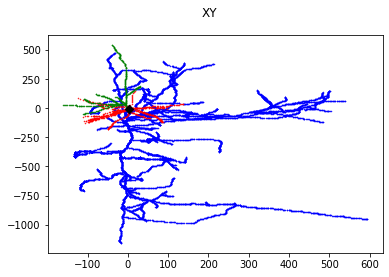

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm
# Load a morphology
morph = nm.load_neuron('Pyr_01.swc')
# Check that it is not centered
print('soma center:',morph.soma.center)
# Visualize it
plot_morphologies([morph])

### Now we can center the soma

soma center: [0. 0. 0.]


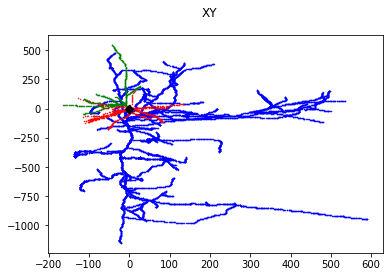

In [4]:
center_morphology(morph)

# Check that it is centered
print('soma center:',morph.soma.center)
# Visualize it
plot_morphologies([morph])

# 2. Placing a morphology into a volume

### Define a cubic volume and sample random positions inside it

In [5]:
import numpy as np
rng = np.random.default_rng()

N = 3 # number of positions
volume = [[1000,3000],[5000,7000],[-2000,2000]] # volume bounds [um]

# get positions in required ranges
pos = rng.random((N,3)) # in [0,1)
for i,x in enumerate(volume):
    pos[:,i] = (x[1] - x[0]) * pos[:,i] + x[0]
    
pos # print positions

array([[ 2089.43191806,  5550.37022523,   854.17022318],
       [ 1799.12624831,  6820.40787567, -1472.11444605],
       [ 1913.95764321,  6845.69265225,  -204.52965353]])

### Load morphologies and place them at those positions (after centering)

In [6]:
import neurom as nm
morph_files = ['Pyr_01.swc','Pyr_02.swc','Int_01.swc']
morphs = [nm.load_neuron(x) for x in morph_files]

# place all morphologies
for i,m in enumerate(morphs):
    center_morphology(m)
    shift_morphology(m,pos[i])

[x.soma.center for x in morphs] # print centers

[array([2089.43191806, 5550.37022523,  854.17022318]),
 array([ 1799.12624831,  6820.40787567, -1472.11444605]),
 array([1913.95764321, 6845.69265225, -204.52965353])]

### Visualize them

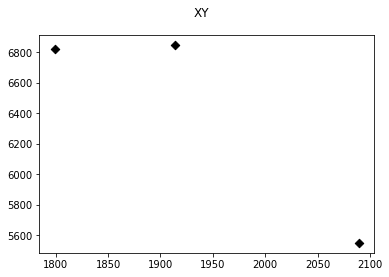

In [7]:
# Plot soma locations
plot_morphologies(morphs,somaOnly = True)

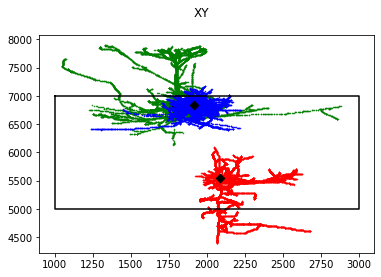

In [8]:
# Plot whole morphologies
plot_morphologies(morphs)
# Plot volume containing somas
plt.plot((volume[0][0],volume[0][1],volume[0][1],volume[0][0],volume[0][0]),
         (volume[1][1],volume[1][1],volume[1][0],volume[1][0],volume[1][1]),c='black')